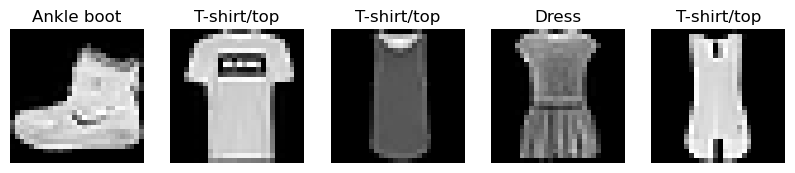

Epoch [1/25], Training Loss: 0.4881, Validation Loss: 0.3621
Epoch [2/25], Training Loss: 0.3202, Validation Loss: 0.3146
Epoch [3/25], Training Loss: 0.2739, Validation Loss: 0.2732
Epoch [4/25], Training Loss: 0.2425, Validation Loss: 0.2673
Epoch [5/25], Training Loss: 0.2201, Validation Loss: 0.2619
Epoch [6/25], Training Loss: 0.2018, Validation Loss: 0.2336
Epoch [7/25], Training Loss: 0.1828, Validation Loss: 0.2397
Epoch [8/25], Training Loss: 0.1679, Validation Loss: 0.2461
Epoch [9/25], Training Loss: 0.1536, Validation Loss: 0.2364
Epoch [10/25], Training Loss: 0.1395, Validation Loss: 0.2357
Epoch [11/25], Training Loss: 0.1267, Validation Loss: 0.2369
Epoch [12/25], Training Loss: 0.1152, Validation Loss: 0.2465
Epoch [13/25], Training Loss: 0.1016, Validation Loss: 0.2719
Epoch [14/25], Training Loss: 0.0945, Validation Loss: 0.2607
Epoch [15/25], Training Loss: 0.0839, Validation Loss: 0.2793
Epoch [16/25], Training Loss: 0.0744, Validation Loss: 0.2870
Epoch [17/25], Tr

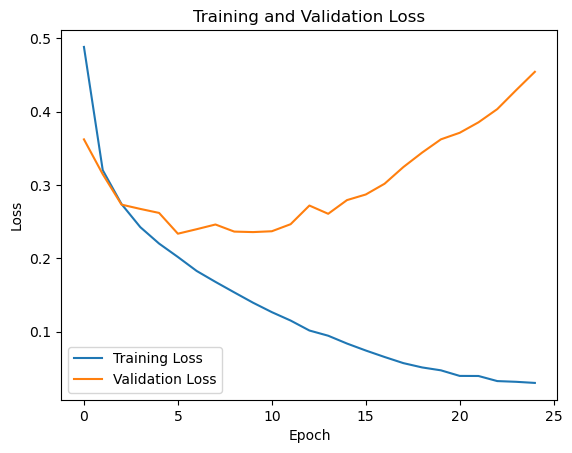

Accuracy on the test set: 91.28%


In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)


classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
num_images_to_show = 5

plt.figure(figsize=(10, 2))
for i in range(num_images_to_show):
    image, label = trainset[i]
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(classes[label])
    plt.axis('off')
plt.show()
train_size = int(0.9 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])


trainset.dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

valset.dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = CNN()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
train_losses = []
val_losses = []

for epoch in range(num_epochs):
   
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
   
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)
    
   
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    
    val_loss /= len(valloader)
    val_losses.append(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, '
          f'Validation Loss: {val_loss:.4f}')


plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        images = (images - 0.5) / 0.5
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')